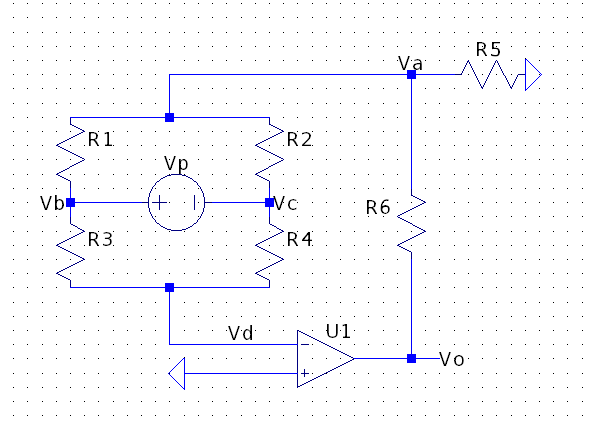

In [2]:
# El amplificador puente es como se observa en la imagen.
import numpy as np
import sympy as sym 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from IPython.display import Image 
sym.init_printing() 
#%matplotlib widget 
%matplotlib inline
Image(filename='amp_puente.png',width=300)  

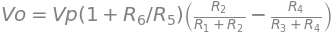

In [11]:
# VERIFICAR QUE Vo RESPONDE A LA SIGUIENTE ECUACION
sym.var('Va, Vb, Vc, Vd, Vo, Vp')
sym.var('R1, R2, R3, R4, R5, R6')
sym.var('Vo_')
display(sym.Eq(Vo_,sym.fu(((1+R6/R5)*(R2/(R1+R2)-R4/(R3+R4))*Vp))))
Vo_=sym.fu(((1+R6/R5)*(R2/(R1+R2)-R4/(R3+R4))*Vp))

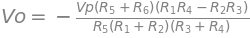

In [12]:
find=sym.Matrix(([Va],[Vb],[Vc],[Vd],[Vo])) #Incognitas
#Se escriben tantas ecuacionenes como nodos haya
ec_nodo_0=sym.Eq(Vd,0)
ec_nodo_1=sym.Eq(Vb-Vc,Vp) 
ec_nodo_2=sym.Eq((Vb-Vd)/R3+(Vc-Vd)/R4,0)
ec_nodo_3=sym.Eq(Va/R5+(Va-Vo)/R6,0)
ec_nodo_4=sym.Eq((Vb-Va)/R1+(Vb-Vd)/R3,(Va-Vc)/R2+(Vd-Vc)/R4)#Caso especial de superNodo
display(sym.Eq(Vo,sym.factor(sym.solve([ec_nodo_0,ec_nodo_1,ec_nodo_2,ec_nodo_3,ec_nodo_4],find)[Vo])))
Vo=sym.simplify(sym.factor(sym.solve([ec_nodo_0,ec_nodo_1,ec_nodo_2,ec_nodo_3,ec_nodo_4],find)[Vo]))

In [15]:
print('Se valida la ecuación?',np.invert(np.bool_(sym.simplify(Vo_-Vo))))
sym.simplify(Vo_-Vo)

Se valida la ecuación? True


In [17]:
sym.var('Av,R, D, Vo_calc') # Si Av es la ganancia Av=(1+R6/R5)   R1=R-D (Contrae) R2=R+D R1/R2=R4/R3

display(sym.Eq(Vo_calc,sym.simplify((Vo.subs({(R1,R-D),(R2,R+D),(R3,R+D),(R4,R-D),(R6,(Av-1)*R5)})))))
Vo_calc=sym.simplify((Vo.subs({(R1,R-D),(R2,R+D),(R3,R+D),(R4,R-D),(R6,(Av-1)*R5)})))